# Verification and Hyperparameters

## 1. Model evaluation

### 1.01 Time-delay neural net predictions

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import xarray as xr

import sys
sys.path.append('../../')
from python.aux.plot import plot_recurrent
from python.aux.utils import xr_to_datetime

In [2]:
# load the truth (reanalysis)
glofas = xr.open_dataset('../../data/smallsampledata-glofas.nc')
dis = glofas['dis']

lat, lon = 48.35, 13.95  # the point where predictions are made
truth = dis.interp(latitude=lat, longitude=lon)
truth

<xarray.DataArray 'dis' (time: 5478)>
array([798.361572, 792.207703, 796.706116, ..., 783.30896 , 782.144958,
       778.828003])
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 1995-12-31
    latitude   float64 48.35
    longitude  float64 13.95
Attributes:
    long_name:  discharge
    units:      m3/s

In [3]:
def open_prediction(path):
    """Convenience function"""
    return xr.open_dataset(path).to_array().squeeze().drop(['variable', 'name'])

In [4]:
# load predictions
model_dir = '../../models/'

model_name = 'tdnn-catchment_mean-differences2'

In [5]:
validation = open_prediction(model_dir+model_name+'/validation.nc')
test = open_prediction(model_dir+model_name+'/test.nc')

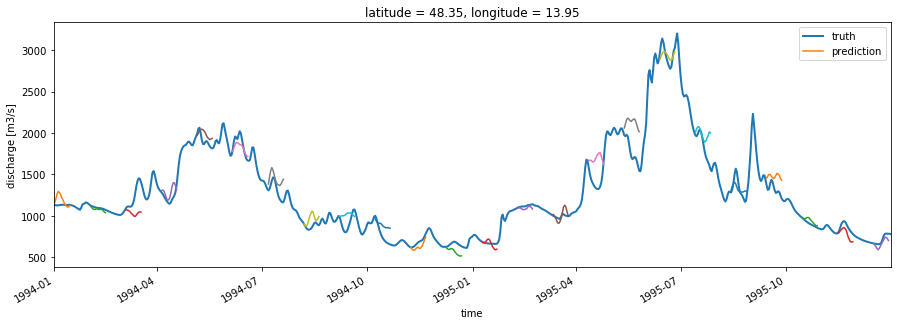

In [6]:
test_time = slice('1994', '1995')

fix, ax = plt.subplots(figsize=(15,5))
plot_recurrent(ax, truth=truth.sel(time=test_time), 
                   prediction=test, each_N=31)

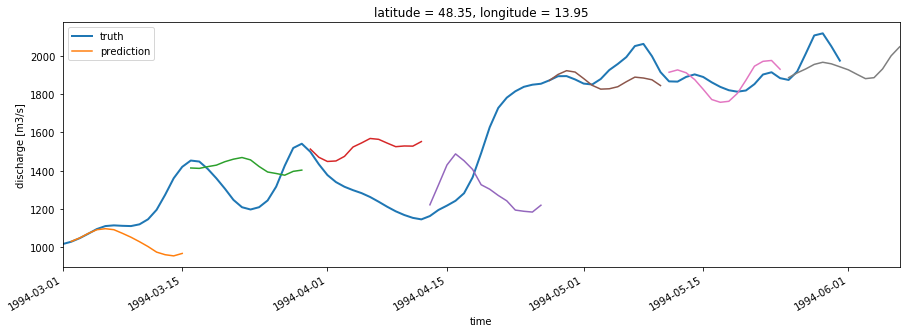

In [7]:
time=slice('1994-03', '1994-05')

fix, ax = plt.subplots(figsize=(15,5))
plot_recurrent(ax, truth=truth.sel(time=time),
                   prediction=test.sel(init_time=time),
                   each_N=14)

## 2. Hyperparameters

### 2.01 Time-delay neural net

- Architecture (hidden layers, number of nodes)

description




### 2.02 LSTM network

- Architecture (stacked layers)

description

- Number of forecast days


- Regularization (dropout)

description